📘 Financial Analysis of Microsoft, Tesla, and Apple (2022–2024)
In this project, we analyze the financial performance of three major companies — Microsoft, Tesla, and Apple — over the past three fiscal years. The analysis involves extracting financial data from SEC 10-K filings, calculating growth metrics, and visualizing trends using Python and pandas.

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv(r"Financials_Microsoft_Tesla_Apple.csv")

In [10]:
df.head(3)

,Company,Year,Total Revenue (USD M),Net Income (USD M),Total Assets (USD M),Total Liabilities (USD M),Cash Flow from Operating Activities (USD M)
0,Microsoft,2024,245122,88136,512163,125286,118548
1,Microsoft,2023,211915,72361,411976,104149,87582
2,Microsoft,2022,198270,72738,364840,198298,89035


🔍 Initial Data Overview
We loaded a CSV containing the following financial metrics for 2022–2024:

-Total Revenue

-Net Income

-Total Assets

-Total Liabilities

-Cash Flow from Operating Activities

Each value is in millions of USD (USD M). Companies included are Microsoft, Tesla, and Apple.

In [11]:
df = df.sort_values(by=['Company', 'Year']) 

df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue (USD M)'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income (USD M)'].pct_change() * 100


📊 Revenue and Net Income Growth
Growth rates were calculated using percentage change between years for each company.
Key Observations:

Microsoft showed consistent revenue growth, with a significant spike in 2024.

Tesla’s revenue growth slowed in 2024, and net income dropped by over 50%.

Apple had strong growth in 2023, but both revenue and net income slightly declined in 2024.

In [13]:
df.head(10)

,Company,Year,Total Revenue (USD M),Net Income (USD M),Total Assets (USD M),Total Liabilities (USD M),Cash Flow from Operating Activities (USD M),Revenue Growth (%),Net Income Growth (%)
8,Apple,2022,365817,94680,352755,302083,122151,NaN,NaN
7,Apple,2023,394328,99803,352583,290437,110543,7.793788,5.410858
6,Apple,2024,391040,93740,364980,308030,118250,-0.833824,-6.074968
2,Microsoft,2022,198270,72738,364840,198298,89035,NaN,NaN
1,Microsoft,2023,211915,72361,411976,104149,87582,6.882030,-0.518299
0,Microsoft,2024,245122,88136,512163,125286,118548,15.669962,21.800417
5,Tesla,2022,81462,12587,82338,36849,14724,NaN,NaN
4,Tesla,2023,96773,14974,82338,43251,13256,18.795267,18.964010
3,Tesla,2024,97690,7153,122070,48453,14923,0.947578,-52.230533


In [14]:
df.groupby('Company')[['Total Revenue (USD M)', 'Net Income (USD M)','Cash Flow from Operating Activities (USD M)']].agg(['mean', 'sum', 'min', 'max'])


Total Revenue (USD M)                          Net Income (USD M)  \
                           mean      sum     min     max               mean   
Company                                                                       
Apple             383728.333333  1151185  365817  394328       96074.333333   
Microsoft         218435.666667   655307  198270  245122       77745.000000   
Tesla              91975.000000   275925   81462   97690       11571.333333   

                                Cash Flow from Operating Activities (USD M)  \
              sum    min    max                                        mean   
Company                                                                       
Apple      288223  93740  99803                               116981.333333   
Microsoft  233235  72361  88136                                98388.333333   
Tesla       34714   7153  14974                                14301.000000   

                                   
              sum     min     max  
Company                            
Apple      350944  110543  122151  
Microsoft  295165   87582  118548  
Tesla       42903   13256   14923

In [15]:
df.groupby('Year')[['Total Revenue (USD M)', 'Net Income (USD M)']].sum()


,Total Revenue (USD M),Net Income (USD M)
Year,,
2022,645549,180005
2023,703016,187138
2024,733852,189029


In [16]:
df['Net Income Margin (%)'] = (df['Net Income (USD M)'] / df['Total Revenue (USD M)']) * 100

In [17]:
df.groupby('Company')['Net Income Margin (%)'].mean()


Company
Apple        25.054469
Microsoft    35.596183
Tesla        12.748947
Name: Net Income Margin (%), dtype: float64

In [18]:
df['Debt Ratio (%)'] = (df['Total Liabilities (USD M)'] / df['Total Assets (USD M)']) * 100
df.groupby('Company')['Debt Ratio (%)'].mean()


Company
Apple        84.135280
Microsoft    34.698178
Tesla        45.658245
Name: Debt Ratio (%), dtype: float64

Aggregated Financial Insights
We explored additional metrics across companies and years:

Net Income Margin reveals Apple consistently maintains the strongest profitability.

Debt Ratio shows Tesla has a more conservative financial structure compared to Microsoft and Apple.

Total industry revenue grew overall between 2022 and 2024, with Microsoft contributing the most absolute revenue increase.

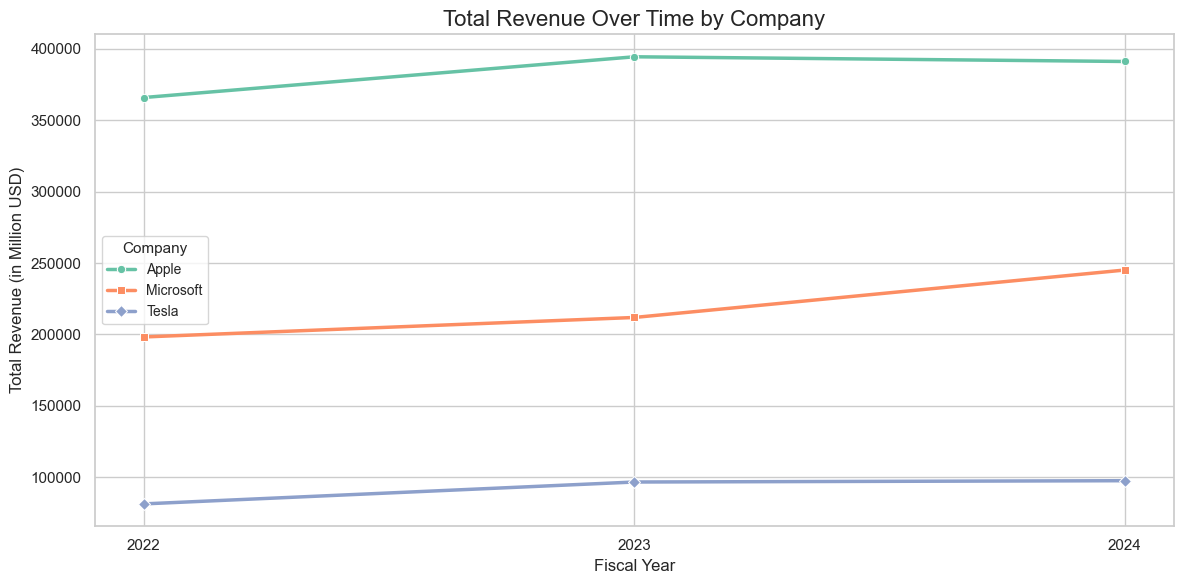

In [23]:
# Set seaborn style
sns.set_theme(style='whitegrid')

# Create a larger figure
plt.figure(figsize=(12, 6))

# Define custom markers for each company
markers = {'Apple': 'o', 'Microsoft': 's', 'Tesla': 'D'}  # o = circle, s = square, D = diamond

# Draw the lineplot with custom markers and styling
sns.lineplot(
    data=df,
    x='Year',
    y='Total Revenue (USD M)',
    hue='Company',
    style='Company',
    markers=markers,
    dashes=False,
    linewidth=2.5,
    palette='Set2'
)

# Add chart elements
plt.title("Total Revenue Over Time by Company", fontsize=16)
plt.xlabel("Fiscal Year", fontsize=12)
plt.ylabel("Total Revenue (in Million USD)", fontsize=12)
plt.legend(title='Company', fontsize=10, title_fontsize=11)
plt.xticks(df['Year'].unique())  # Make sure all years show up
plt.tight_layout()

# Show the final plot
plt.show()


📈 Revenue Trends Visualization
The line chart shows that:

Microsoft experienced steady and strong revenue growth year-over-year.

Tesla’s growth slowed after a strong 2022–2023 jump.

Apple peaked in 2023 and had a slight decline in 2024.

✅ Conclusion
This analysis revealed key financial trends among three tech leaders:

Microsoft had the most consistent and substantial revenue growth.

Apple maintained high profitability but saw a small dip in 2024.

Tesla showed rapid revenue growth early on but struggled with declining net income in 2024.

The analysis leveraged pandas for data handling, seaborn for visualization, and financial ratios to interpret corporate performance. This method can be applied to any publicly listed company using SEC 10-K data.